In [0]:
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from random import randint
import numpy as np
import os
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import random

In [0]:
class DoodleCNN():
    def __init__(self, data_dir, limit=None, split=0.05):
        self.classes = {}
        self.load(data_dir, split, limit)
        self.buildModel()
        
    def load(self, data_dir, split=0.05, limit=None):
        X = []
        Y = []
        label = -1
        for file in os.listdir(data_dir):
            if file.endswith(".npy"):
                label += 1
                contents = self.reshape(np.load(data_dir + file)[0:limit])
                self.classes[label] = file[:-4]
                X = X + contents
                Y = Y + [label for _ in range(0, len(contents))]
        X = self.normalize(X)
        self.X_train, self.X_test, self.Y_train, self.Y_test = self.split(X, Y, split)
        
    def reshape(self, contents):
        reshaped = []
        for i in range(len(contents)):
            image = np.reshape(contents[i], (28, 28, 1))
            reshaped.append(image)
        return reshaped
        
    def normalize(self, data):
        return np.interp(data, [0, 255], [-1, 1])
            
    def split(self, X, Y, split=0.05):
        X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=split)
        Y_train = np_utils.to_categorical(Y_train, len(self.classes))
        Y_test = np_utils.to_categorical(Y_test, len(self.classes))
        return X_train, X_test, Y_train, Y_test
    
    def buildModel(self):
        self.model = Sequential()
        self.model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), padding='same'))
        self.model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(len(self.classes), activation='softmax'))
        
    def train(self, epochs=10):
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model.fit(np.array(self.X_train), np.array(self.Y_train), batch_size=32, epochs=epochs, shuffle=True)
        
    def test(self):
        loss, acc = self.model.evaluate(self.X_test, self.Y_test, verbose=0)
        print('\nTesting acc: {}, loss: {}\n'.format(acc, loss))
        
    def predict(self, arr):
        return self.model.predict(arr)
        
    def randomPrediction(self):
        index = random.randint(0,len(self.X_test) - 1)
        
        y_hat = self.predict(self.X_test)[index]
        pred_class = self.classes[max(range(len(y_hat)), key=y_hat.__getitem__)]
        
        y = self.Y_test[index]
        actual_class = self.classes[max(range(len(y)), key=y.__getitem__)]
        
        print("Predicition Probabilities:", y_hat)
        print("\nPredicted Class: {}\nActual Class: {}".format(pred_class, actual_class))
        
        img = denormalize(self.X_test[index])
        plot = plt.figure(figsize=(4,4))
        plt.imshow(img.reshape(28,28))
        plt.grid(False)


In [231]:
nn = DoodleCNN("data/", 5000, 0.05)
print(nn.classes)
print(np.shape(nn.X_train), np.shape(nn.Y_train), np.shape(nn.X_test), np.shape(nn.Y_test))

{0: 'blueberry', 1: 'apple', 2: 'blackberry', 3: 'pineapple', 4: 'pear', 5: 'watermelon', 6: 'banana', 7: 'strawberry', 8: 'grapes'}
(42750, 28, 28, 1) (42750, 9) (2250, 28, 28, 1) (2250, 9)


In [232]:
nn.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
__________

Epoch 1/100
42750/42750 [==============================] - 19s 451us/step - loss: 0.8456 - acc: 0.7208
Epoch 2/100
42750/42750 [==============================] - 18s 421us/step - loss: 0.6268 - acc: 0.7961
Epoch 3/100
42750/42750 [==============================] - 18s 420us/step - loss: 0.5574 - acc: 0.8166
Epoch 4/100
42750/42750 [==============================] - 18s 421us/step - loss: 0.5012 - acc: 0.8312
Epoch 5/100
42750/42750 [==============================] - 18s 416us/step - loss: 0.4539 - acc: 0.8467
Epoch 6/100
42750/42750 [==============================] - 18s 416us/step - loss: 0.4142 - acc: 0.8583
Epoch 7/100
42750/42750 [==============================] - 18s 417us/step - loss: 0.3825 - acc: 0.8686
Epoch 8/100
42750/42750 [==============================] - 18s 415us/step - loss: 0.3556 - acc: 0.8758
Epoch 9/100
42750/42750 [==============================] - 18s 416us/step - loss: 0.3328 - acc: 0.8847
Epoch 10/100
42750/42750 [==============================] - 18s 415us/ste

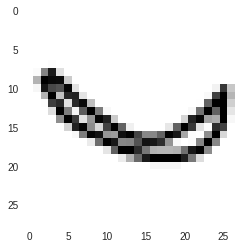

In [233]:
nn.train(100)
nn.test()
nn.randomPrediction()


Testing acc: 0.8346666667196486, loss: 0.9010280759599474

Predicition Probabilities: [4.6289379e-19 3.0709952e-30 6.9225376e-18 1.0000000e+00 7.0242705e-30
 2.8021198e-23 2.2975686e-31 1.9989512e-16 1.2060971e-22]

Predicted Class: pineapple
Actual Class: pineapple


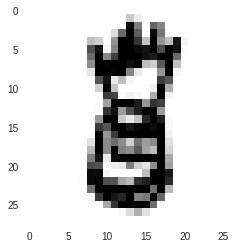

In [234]:
nn.test()
nn.randomPrediction()